# Sentiment analysis

In this notebook, we will apply the DistillBERT sentiment analysis model to the clean dataset and save the result. 

### Imports

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Add the project root directory (not src) to sys.path
sys.path.append(os.path.abspath("../data/"))

# Now import the DataLoader class
from data_loading import DataLoader

raw = '../../data/RAW/'
clean = '../../data/CLEAN'

In [4]:
# Add the directory containing the script to sys.path
sys.path.append(os.path.abspath("../model"))

# Now you can import the script like a module
import DistillBERT_emotion

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


## Load the data

In [5]:
#load raw data
data_loader = DataLoader(raw,clean)

Test_set_data = False
if Test_set_data :
    MovieData = data_loader.plot_data()
    ViolentLabel, ViolentData = data_loader.human_labelled_data()
    MovieData = MovieData.loc[ViolentData.index.unique()]
else :
    MovieData = data_loader.clean_movie_data()

In [6]:
MovieData.head()

,Movie name,Release date,Box office revenue,Languages,Countries,Genres,Plot
Wikipedia movie ID,,,,,,,
975900,Ghosts of Mars,2001-08-24,14010832.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...","set in the second half of the 22nd century, th..."
6631279,Little city,1997-04-04,NaN,English Language,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...","adam, a san francisco-based artist who works a..."
77856,Mary Poppins,1964-08-27,102272727.0,English Language,United States of America,"Children's/Family, Musical, Fantasy, Comedy, D...",the film opens with mary poppins perched in a...
21926710,White on Rice,2009-05-31,NaN,NaN,United States of America,"Romantic comedy, Romance Film, Comedy, Indie",jimmy ([[hiroshi watanabe loves dinosaurs and...
156558,Baby Boy,2001-06-27,29381649.0,English Language,United States of America,"Crime Fiction, Drama, Coming of age",a young 20-year-old named jody lives with his...


## distillBERT sentiment analysis

In [7]:

# Lists to accumulate rows for efficiency
sentiment_data = []

detector = DistillBERT_emotion.ViolenceDetector()
i = 0
for index,row in MovieData.iterrows():
    if i%1000 ==0:
        print(i)
    result = detector.analyze_violence(row["Plot"])

    if Test_set_data : 
        sentiment_data.append({
            "Wikipedia movie ID": index,
            "sadness": result[0],
            "joy": result[1],
            "love": result[2],
            "anger": result[3],
            "fear": result[4],
            "surprise": result[5]
        })
    else :
        sentiment_data.append({
            "Wikipedia movie ID": index,
            "name" : row["Movie name"],
            "sadness": result[0],
            "joy": result[1],
            "love": result[2],
            "anger": result[3],
            "fear": result[4],
            "surprise": result[5]
        })
    i += 1

Sentiment = pd.DataFrame(sentiment_data)

0


Token indices sequence length is longer than the specified maximum sequence length for this model (1891 > 512). Running this sequence through the model will result in indexing errors


1000
2000


KeyboardInterrupt: 

In [8]:
Sentiment =Sentiment.set_index("Wikipedia movie ID")
Sentiment.head()

,sadness,joy,love,anger,fear,surprise
Wikipedia movie ID,,,,,,
19286405,0.058061,0.003358,0.000692,0.934285,0.003266,0.000338
6714641,0.001600,0.001495,0.000530,0.940499,0.055357,0.000519
27573594,0.009460,0.008160,0.001356,0.060288,0.918629,0.002107
25874731,0.060930,0.006543,0.001101,0.264932,0.665094,0.001399
34954266,0.029678,0.011213,0.000931,0.030358,0.923933,0.003888


In [9]:
# save the result
if Test_set_data : 
    Sentiment.to_csv(clean + "/sentiment_test.csv") 
else : 
    Sentiment.to_csv(clean + "/sentiment.csv") 

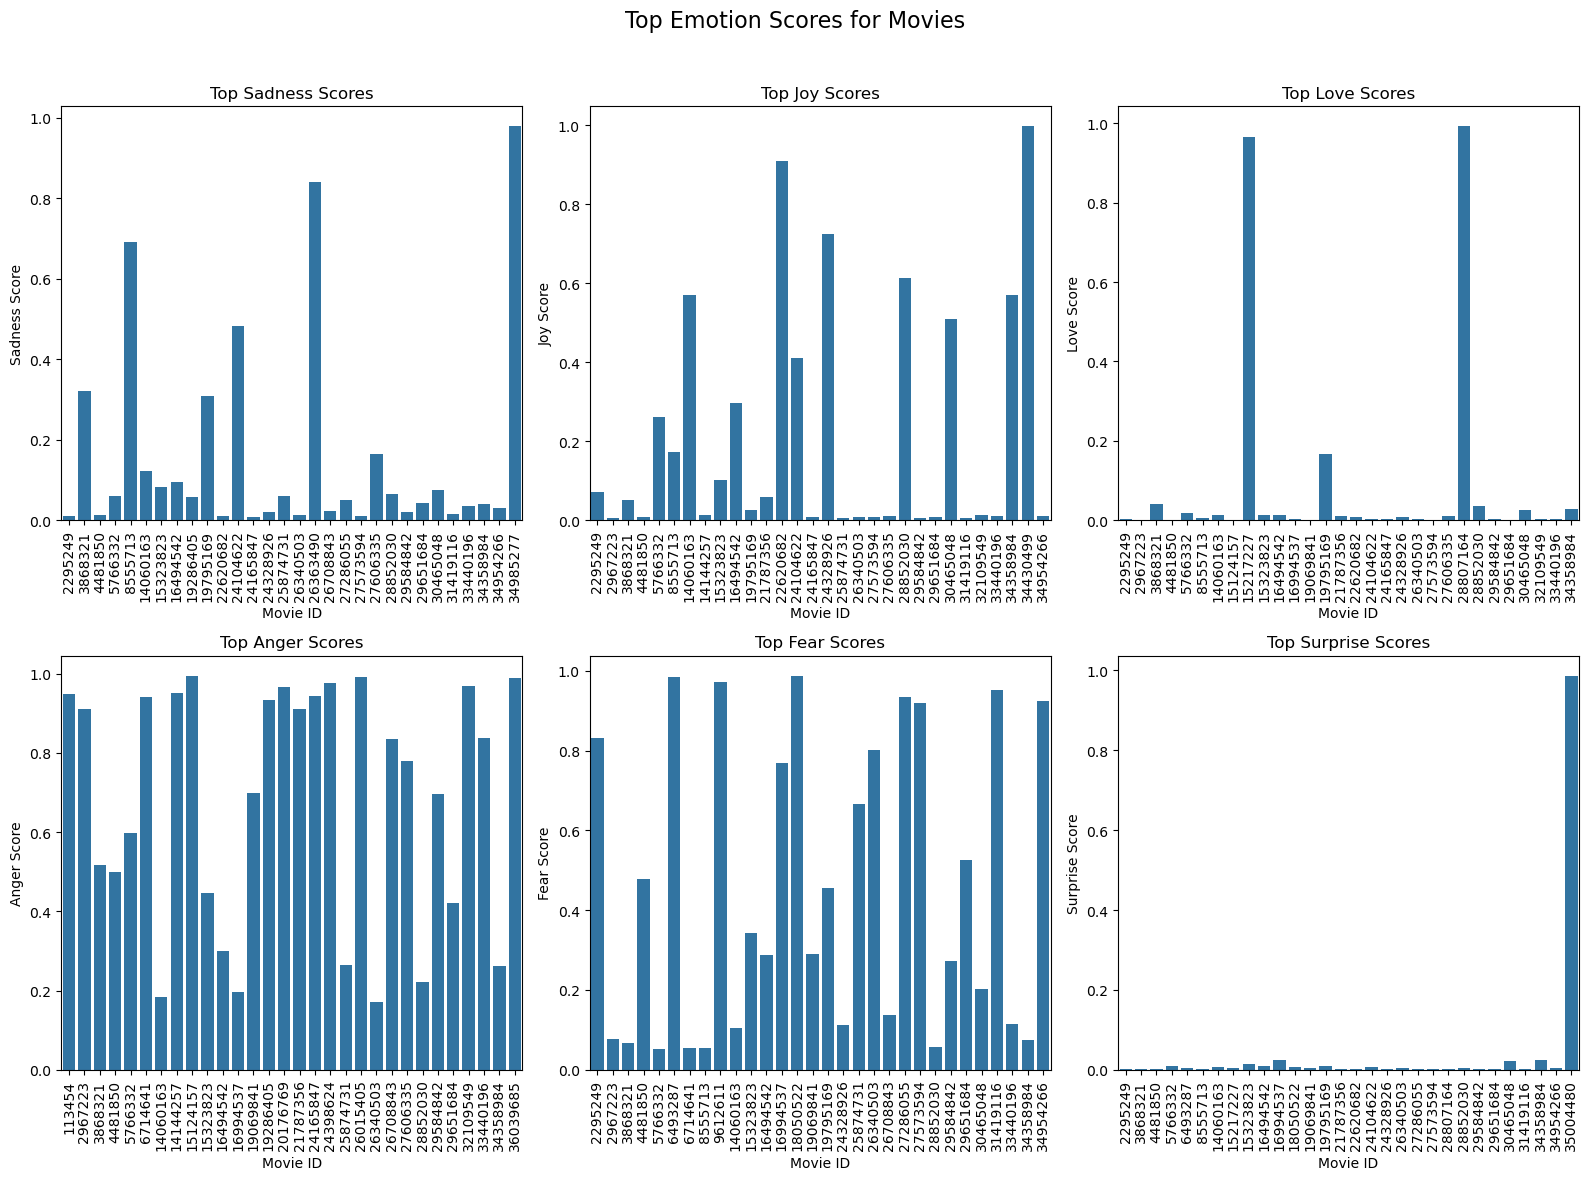

In [10]:
X = 30
emotions = ["sadness",
            "joy",
            "love",
            "anger",
            "fear",
            "surprise"]

# Create a figure with subplots (1x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(16,12))

# Set a title for the entire figure
fig.suptitle('Top Emotion Scores for Movies', fontsize=16)

for i in range(0,len(emotions)):
    
    # Plot for Sadness with vertical x labels
    if Test_set_data :
        Data = Sentiment.sort_values(emotions[i],ascending=False).iloc[0:min(X,Sentiment.shape[0])]
        sns.barplot(x=Data.index, y=emotions[i], data=Data,ax=axes[i//3, i%3])
    else :
        sns.barplot(x='name', y=emotions[i], data=Sentiment.sort_values(emotions[i],ascending=False).iloc[0:min(X,Sentiment.shape[0])],ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Top {emotions[i].capitalize()} Scores')
    axes[i//3, i%3].set_xlabel('Movie ID')
    axes[i//3, i%3].set_ylabel(f'{emotions[i].capitalize()} Score')

    axes[i//3, i%3].set_xticks(range(min(X,Sentiment.shape[0])))  # Ensure ticks are set
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=90)


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit suptitle
plt.show()
